In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tcn import TCN
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
import random

In [56]:
# Set a seed value
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

## LSTM for Cluster

In [57]:
# read files:
price_df = pd.read_csv("gold_data/Gold Futures Historical Data.csv")
sentiment_df = pd.read_csv("gold_data/Combined.csv")

price_df["Change %"] = price_df["Change %"].str.rstrip("%").astype(float)

In [58]:
price_df

,Date,Price,Open,High,Low,Vol.,Change %
0,12/06/2019,"1,462.50","1,478.20","1,481.50","1,461.00",0.68K,-1.20
1,12/05/2019,"1,480.30","1,477.60","1,482.70","1,475.90",0.64K,0.19
2,12/04/2019,"1,477.50","1,480.40","1,487.00","1,474.00",0.88K,-0.28
3,12/03/2019,"1,481.60","1,465.50","1,484.70","1,462.80",1.40K,1.04
4,12/02/2019,"1,466.40","1,467.30","1,468.50","1,457.40",1.40K,-0.24
...,...,...,...,...,...,...,...
4995,02/22/2000,307.70,307.60,309.40,304.20,25.89K,0.13
4996,02/18/2000,307.30,303.30,307.80,302.00,19.38K,1.15
4997,02/17/2000,303.80,305.30,312.50,300.00,11.81K,-0.39
4998,02/16/2000,305.00,304.20,306.00,299.70,56.34K,0.30


In [59]:
sentiment_df = sentiment_df[sentiment_df["dataset"] == "gold"]

In [60]:
sentiment_df["date"] = pd.to_datetime(
    sentiment_df["date"], dayfirst=True, errors="coerce"
)

price_df["Date"] = pd.to_datetime(price_df["Date"], errors="coerce")

In [61]:
sentiment_df.shape

(10570, 6)

In [62]:
original_df = pd.read_csv("gold-dataset-sinha-khandait.csv")

In [63]:
original_df

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative
...,...,...,...,...,...,...,...,...,...,...
10565,07-01-2013,https://www.moneycontrol.com/news/business/mar...,gold seen falling from 3-week high this week,0,0,1,0,1,0,negative
10566,27-09-2018,https://www.metalsdaily.com/link/284468/domini...,dominic frisby : now looks like a good time to...,1,0,0,0,0,1,positive
10567,03-03-2017,https://www.thehindubusinessline.com/markets/g...,Gold heading for worst week since November on ...,0,0,1,0,1,0,negative
10568,11-06-2008,http://www.marketwatch.com/story/august-gold-u...,august gold up $7.60 at $878.80 an ounce on nymex,1,0,0,0,1,0,positive


In [64]:
sentiment_df

,date,news,Gemni_category,dataset,finbert_sentiment,finbert_score
0,2016-01-28,"april gold down 20 cents to settle at $1,116.1...",Commodity Price Movement,gold,negative,0.946941
1,2017-09-13,gold suffers third straight daily decline,Commodity Price Movement,gold,negative,0.932014
2,2016-07-26,Gold futures edge up after two-session decline,Commodity Price Movement,gold,positive,0.859070
3,2018-02-28,dent research : is gold's day in the sun comin...,Other,gold,neutral,0.914657
4,NaT,"Gold snaps three-day rally as Trump, lawmakers...",Geopolitics,gold,positive,0.488616
...,...,...,...,...,...,...
10565,NaT,gold seen falling from 3-week high this week,Commodity Price Movement,gold,negative,0.963273
10566,2018-09-27,dominic frisby : now looks like a good time to...,Commodity Price Movement,gold,neutral,0.868075
10567,NaT,Gold heading for worst week since November on ...,Interest Rates & Inflation,gold,negative,0.919911
10568,NaT,august gold up $7.60 at $878.80 an ounce on nymex,Commodity Price Movement,gold,positive,0.924901


In [65]:
import pandas as pd

# Step 1: Make sure 'Dates' in original_df is in datetime format
original_df["Dates"] = pd.to_datetime(
    original_df["Dates"], dayfirst=True, errors="coerce"
)

# Step 2: Normalize 'news' in both DataFrames
original_df["news_clean"] = original_df["News"].str.strip().str.lower()
sentiment_df["news_clean"] = sentiment_df["news"].str.strip().str.lower()

# Step 3: Create mapping from news_clean to Dates
news_to_date = original_df.set_index("news_clean")["Dates"].to_dict()

# Step 4: Fill missing dates in sentiment_df
sentiment_df["date"] = sentiment_df["date"].fillna(
    sentiment_df["news_clean"].map(news_to_date)
)

# Optional cleanup: Drop the helper column if not needed
sentiment_df.drop(columns="news_clean", inplace=True)
sentiment_df

,date,news,Gemni_category,dataset,finbert_sentiment,finbert_score
0,2016-01-28,"april gold down 20 cents to settle at $1,116.1...",Commodity Price Movement,gold,negative,0.946941
1,2017-09-13,gold suffers third straight daily decline,Commodity Price Movement,gold,negative,0.932014
2,2016-07-26,Gold futures edge up after two-session decline,Commodity Price Movement,gold,positive,0.859070
3,2018-02-28,dent research : is gold's day in the sun comin...,Other,gold,neutral,0.914657
4,2017-09-06,"Gold snaps three-day rally as Trump, lawmakers...",Geopolitics,gold,positive,0.488616
...,...,...,...,...,...,...
10565,2013-01-07,gold seen falling from 3-week high this week,Commodity Price Movement,gold,negative,0.963273
10566,2018-09-27,dominic frisby : now looks like a good time to...,Commodity Price Movement,gold,neutral,0.868075
10567,2017-03-03,Gold heading for worst week since November on ...,Interest Rates & Inflation,gold,negative,0.919911
10568,2008-06-11,august gold up $7.60 at $878.80 an ounce on nymex,Commodity Price Movement,gold,positive,0.924901


In [66]:
merged_df = pd.merge(
    sentiment_df, price_df, left_on="date", right_on="Date", how="left"
)

In [67]:
merged_df.columns

Index(['date', 'news', 'Gemni_category', 'dataset', 'finbert_sentiment',
       'finbert_score', 'Date', 'Price', 'Open', 'High', 'Low', 'Vol.',
       'Change %'],
      dtype='object')

In [68]:
subset_df = merged_df[
    [
        "date",
        "finbert_score",
        "Date",
        "Price",
        "Open",
        "High",
        "Low",
        "Vol.",
        "Change %",
    ]
]
# we have 703 rows with no data to it. Needs to be invested into
sum(subset_df["Price"].isna())

703

In [69]:
subset_df = subset_df[subset_df["Price"].isna() != True]

In [70]:
subset_df

,date,finbert_score,Date,Price,Open,High,Low,Vol.,Change %
0,2016-01-28,0.946941,2016-01-28,"1,116.10","1,126.20","1,126.40","1,110.20",151.22K,0.03
1,2017-09-13,0.932014,2017-09-13,"1,328.00","1,336.20","1,340.50","1,324.50",306.37K,-0.35
2,2016-07-26,0.859070,2016-07-26,"1,320.80","1,315.50","1,324.40","1,313.60",203.41K,0.10
3,2018-02-28,0.914657,2018-02-28,"1,317.90","1,318.90","1,323.70","1,316.70",263.80K,-0.05
4,2017-09-06,0.488616,2017-09-06,"1,339.00","1,345.00","1,347.70","1,336.40",309.35K,-0.41
...,...,...,...,...,...,...,...,...,...
10565,2013-01-07,0.963273,2013-01-07,"1,646.30","1,656.30","1,663.00","1,642.60",140.82K,-0.16
10566,2018-09-27,0.868075,2018-09-27,"1,185.50","1,196.80","1,200.40","1,184.20",0.34K,-0.75
10567,2017-03-03,0.919911,2017-03-03,"1,226.50","1,234.80","1,236.70","1,223.00",272.29K,-0.52
10568,2008-06-11,0.924901,2008-06-11,882.90,871.20,885.90,870.00,103.59K,1.34


In [71]:
subset_df.shape

(9867, 9)

In [72]:
change_pct = subset_df["Change %"].values.reshape(-1, 1)
change_pct

array([[ 0.03],
       [-0.35],
       [ 0.1 ],
       ...,
       [-0.52],
       [ 1.34],
       [ 0.55]])

In [73]:
len(change_pct)

9867

In [ ]:
subset_df["Finbert_Shifted"] = subset_df["finbert_score"].shift(1)

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

finbert_scores = subset_df["Finbert_Shifted"].values.reshape(-1, 1)
change_pct = subset_df["Change %"].values.reshape(-1, 1)

scaled_change_pct = scaler.fit_transform(change_pct)

scaled_bert = scaler.fit_transform(finbert_scores)

In [76]:
def create_sequences_with_bert(change_data, bert_data, window):
    X, y = [], []
    for i in range(len(change_data) - window):

        change_window = change_data[i : i + window]
        # last day value
        bert_score = bert_data[i + window - 1]

        # Expand bert_score to match shape of window
        bert_repeated = np.repeat(bert_score.reshape(1, -1), window, axis=0)

        # Stack both features together (change_pct + finbert score)
        sequence = np.hstack((change_window, bert_repeated))

        X.append(sequence)
        y.append(change_data[i + window])  # target is still % change
    return np.array(X), np.array(y)


window_size = 30
X, y = create_sequences_with_bert(scaled_change_pct, scaled_bert, window_size)

In [77]:
finbert_scores

array([[       nan],
       [0.9469406 ],
       [0.93201411],
       ...,
       [0.86807483],
       [0.91991103],
       [0.92490131]])

In [78]:
len(X)

9837

In [79]:
# Split into training and test sets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Make sure types are compatible
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

In [80]:
X[1]

array([[-0.32508493,  0.67862944],
       [ 0.07531503,  0.67862944],
       [-0.05815162,  0.67862944],
       [-0.37847159,  0.67862944],
       [ 0.60918165,  0.67862944],
       [-0.73438267,  0.67862944],
       [-0.20941383,  0.67862944],
       [-0.38736937,  0.67862944],
       [ 0.95619495,  0.67862944],
       [ 0.71595497,  0.67862944],
       [-1.13478263,  0.67862944],
       [ 0.17319058,  0.67862944],
       [ 0.7426483 ,  0.67862944],
       [-0.61871157,  0.67862944],
       [-0.39626714,  0.67862944],
       [-0.39626714,  0.67862944],
       [-0.81446266,  0.67862944],
       [ 0.08421281,  0.67862944],
       [-0.02256051,  0.67862944],
       [ 0.64477276,  0.67862944],
       [-0.05815162,  0.67862944],
       [-1.1080893 ,  0.67862944],
       [ 0.55579499,  0.67862944],
       [ 0.20878169,  0.67862944],
       [-0.70768934,  0.67862944],
       [-0.67209823,  0.67862944],
       [-0.36067604,  0.67862944],
       [ 0.47571499,  0.67862944],
       [ 0.13759947,

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [82]:
def directional_accuracy(actual, predicted):
    correct = np.sum(np.sign(actual) == np.sign(predicted))
    return (correct / len(actual)) * 100

In [83]:
X.shape[2]

2

In [84]:
# LSTM

n_features = 2

lstm_model = Sequential(
    [
        LSTM(units=64, return_sequences=False, input_shape=(window_size, n_features)),
        Dropout(0.2),
        Dense(32, activation="relu"),
        Dense(1),
    ]
)

# model compile
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss="mse")
lstm_model.summary()

# Train
lstm_history = lstm_model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=2,
)

# Predict
lstm_y_pred_scaled = lstm_model.predict(X_test).flatten()

# Inverse transform predictions (so we can evaluate)
lstm_y_pred_copies = np.repeat(lstm_y_pred_scaled.reshape(-1, 1), 1, axis=1)
lstm_y_test_copies = np.repeat(y_test.reshape(-1, 1), 1, axis=1)

lstm_y_pred = scaler.inverse_transform(lstm_y_pred_copies)[:, 0]
lstm_y_test_orig = scaler.inverse_transform(lstm_y_test_copies)[:, 0]

# Evaluation metrics for LSTM
lstm_mae = mean_absolute_error(lstm_y_test_orig, lstm_y_pred)
print("LSTM MAE:", lstm_mae)

lstm_mae_percentage = (lstm_mae / np.mean(np.abs(lstm_y_test_orig))) * 100
print("LSTM MAE Percentage:", lstm_mae_percentage)

lstm_dir_acc = directional_accuracy(lstm_y_test_orig, lstm_y_pred)
print("LSTM Directional Accuracy (%):", lstm_dir_acc)

lstm_r2 = r2_score(lstm_y_test_orig, lstm_y_pred)
print("LSTM R²:", lstm_r2)

/Users/visheshgupta/miniforge3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,265 (75.25 KB)

 Trainable params: 19,265 (75.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
246/246 - 2s - 7ms/step - loss: 0.9662 - val_loss: 1.1652
Epoch 2/50
246/246 - 1s - 4ms/step - loss: 0.9641 - val_loss: 1.1673
Epoch 3/50
246/246 - 1s - 4ms/step - loss: 0.9629 - val_loss: 1.1674
Epoch 4/50
246/246 - 1s - 4ms/step - loss: 0.9626 - val_loss: 1.1672
Epoch 5/50
246/246 - 1s - 4ms/step - loss: 0.9629 - val_loss: 1.1658
Epoch 6/50
246/246 - 1s - 4ms/step - loss: 0.9626 - val_loss: 1.1659
Epoch 7/50
246/246 - 1s - 4ms/step - loss: 0.9624 - val_loss: 1.1711
Epoch 8/50
246/246 - 1s - 5ms/step - loss: 0.9618 - val_loss: 1.1636
Epoch 9/50
246/246 - 1s - 4ms/step - loss: 0.9631 - val_loss: 1.1661
Epoch 10/50
246/246 - 1s - 5ms/step - loss: 0.9618 - val_loss: 1.1636
Epoch 11/50
246/246 - 1s - 4ms/step - loss: 0.9622 - val_loss: 1.1634
Epoch 12/50
246/246 - 1s - 4ms/step - loss: 0.9624 - val_loss: 1.1649
Epoch 13/50
246/246 - 1s - 4ms/step - loss: 0.9622 - val_loss: 1.1642
Epoch 14/50
246/246 - 1s - 4ms/step - loss: 0.9615 - val_loss: 1.1649
Epoch 15/50
246/246 - 1s - 4m

Compare the above metrics with this baseline:

- LSTM MAE: 0.7164145708084106

- LSTM MAE Percentage: 106.2194

- LSTM Directional Accuracy (%): 48.18913480885312

- LSTM R²: -0.11850190162658691

In [85]:
lstm_y_test_orig

array([0.8345722 , 0.7675282 , 0.8030221 , ..., 0.75175315, 0.9962666 ,
       0.8924141 ], dtype=float32)

In [86]:
lstm_y_pred

array([0.82013935, 0.8179806 , 0.8211095 , ..., 0.89084834, 0.8324033 ,
       0.8263536 ], dtype=float32)

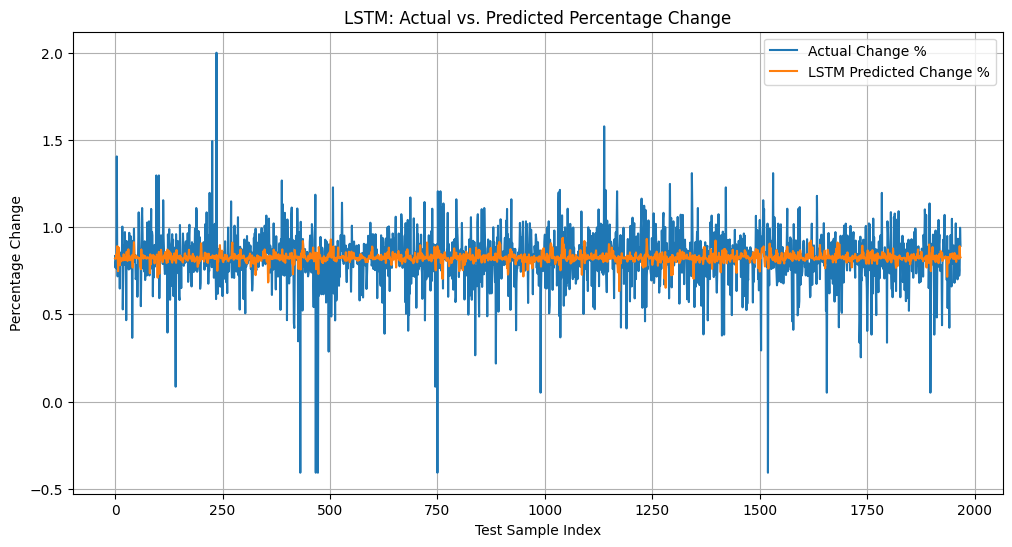

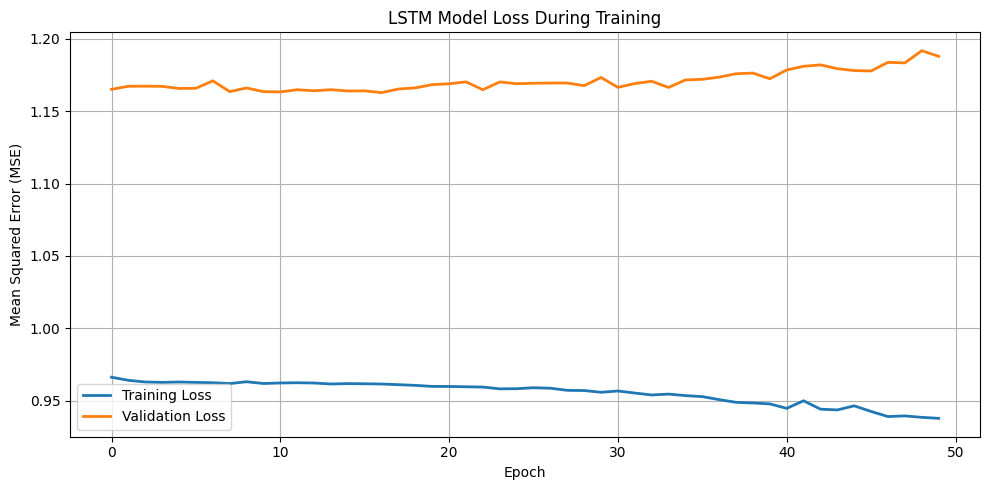

In [87]:
# Plot Actual v Predicted
plt.figure(figsize=(12, 6))
plt.plot(lstm_y_test_orig, label="Actual Change %")
plt.plot(lstm_y_pred, label="LSTM Predicted Change %")
plt.title("LSTM: Actual vs. Predicted Percentage Change")
plt.xlabel("Test Sample Index")
plt.ylabel("Percentage Change")
plt.legend()
plt.grid(True)
plt.show()

# Plot LSTM model loss
plt.figure(figsize=(10, 5))
plt.plot(lstm_history.history["loss"], label="Training Loss", linewidth=2)
plt.plot(lstm_history.history["val_loss"], label="Validation Loss", linewidth=2)
plt.title("LSTM Model Loss During Training")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

LSTM Precision: 0.9975
LSTM Recall: 1.0000


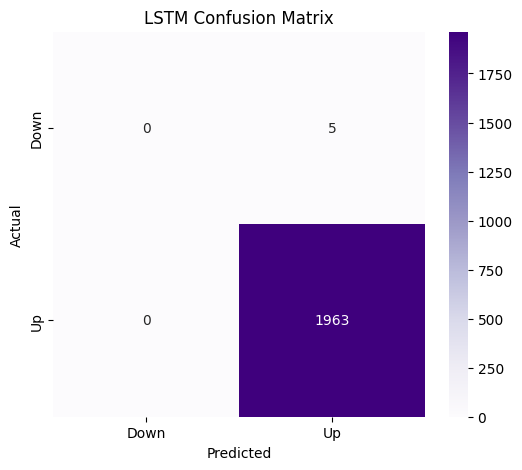

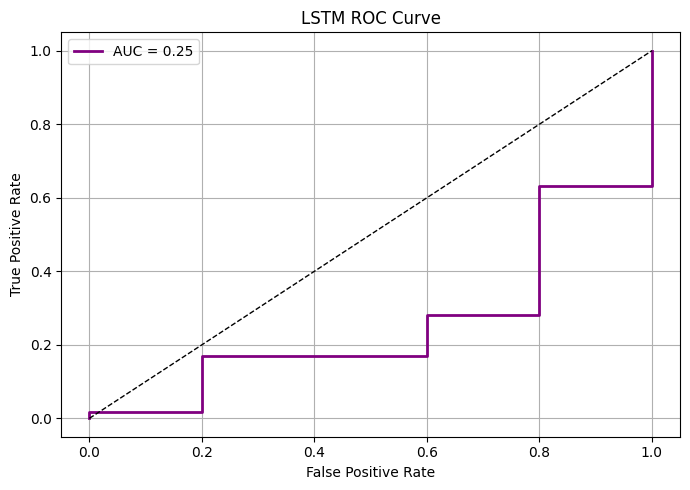

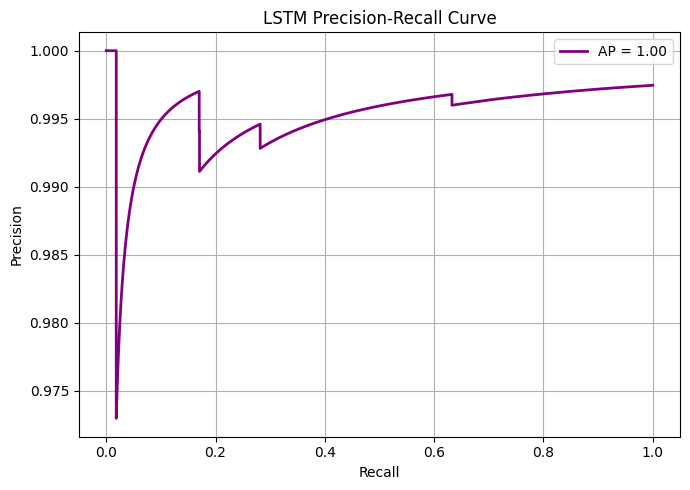

In [88]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
)
import seaborn as sns
import matplotlib.pyplot as plt

# Convert true and predicted % changes to 1 or 0
lstm_y_test_bin = (lstm_y_test_orig > 0).astype(int)
lstm_y_pred_bin = (lstm_y_pred > 0).astype(int)

# Precision and Recall
lstm_precision = precision_score(lstm_y_test_bin, lstm_y_pred_bin)
lstm_recall = recall_score(lstm_y_test_bin, lstm_y_pred_bin)
print(f"LSTM Precision: {lstm_precision:.4f}")
print(f"LSTM Recall: {lstm_recall:.4f}")

# Confusion Matrix
cm = confusion_matrix(lstm_y_test_bin, lstm_y_pred_bin)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Purples",
    xticklabels=["Down", "Up"],
    yticklabels=["Down", "Up"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("LSTM Confusion Matrix")
plt.show()

# Normalize predictions to simulate probability for ROC/PR curves
lstm_y_pred_proba = (lstm_y_pred - lstm_y_pred.min()) / (
    lstm_y_pred.max() - lstm_y_pred.min()
)

# ROC Curve
fpr, tpr, _ = roc_curve(lstm_y_test_bin, lstm_y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="purple", linewidth=2)
plt.plot([0, 1], [0, 1], "k--", linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LSTM ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(
    lstm_y_test_bin, lstm_y_pred_proba
)
ap_score = average_precision_score(lstm_y_test_bin, lstm_y_pred_proba)
plt.figure(figsize=(7, 5))
plt.plot(
    recall_vals,
    precision_vals,
    label=f"AP = {ap_score:.2f}",
    color="purple",
    linewidth=2,
)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("LSTM Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()